### Sandra P K

## Car Price Prediction 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
d=pd.read_csv(r"C:\Users\HP\Documents\My DOCS\Oasis_Intern\Task3\car data1.csv")
d

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
d.head()  # To display first 5 rows 

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
d.tail()     # To display last 5 rows 

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
d.describe()        # Statistical information about dataset 

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
d.shape   # Display the number of rows and columns 

(301, 9)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
d.columns     # Display the all columns 

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
d.duplicated().sum()      # Find out the number of duplicated entries

2

In [10]:
d=d.drop_duplicates()

In [11]:
d.duplicated().sum() 

0

In [12]:
d.isnull().sum()       # Find the number of null or missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### In the given dataset there is no null values

In [13]:
d1=d[['Fuel_Type','Car_Name','Selling_type', 'Transmission', 'Owner']]
d2=d[['Selling_Price', 'Present_Price', 'Driven_kms']] 

#### Data split into two categorical(d1) and numerical(d2)data

## Encode the categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder
for i in d1:
    encoder=LabelEncoder()
    d1[i]=encoder.fit_transform(d1[i])
d1.head()  

,Fuel_Type,Car_Name,Selling_type,Transmission,Owner
0,2,90,0,1,0
1,1,93,0,1,0
2,2,68,0,1,0
3,2,96,0,1,0
4,1,92,0,1,0


## Normalization

In [15]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
sc=s.fit_transform(d2)
d22=pd.DataFrame(sc,columns=d2.columns)
d22.head()

,Selling_Price,Present_Price,Driven_kms
0,-0.249127,-0.228138,-0.254603
1,0.032229,0.233742,0.156181
2,0.534651,0.269991,-0.770651
3,-0.349612,-0.396520,-0.814297
4,0.002084,-0.078466,0.142061


In [16]:
df=pd.concat([d22,d1,d['Year']],axis=1)
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Car_Name,Selling_type,Transmission,Owner,Year
0,-0.249127,-0.228138,-0.254603,2.0,90.0,0.0,1.0,0.0,2014.0
1,0.032229,0.233742,0.156181,1.0,93.0,0.0,1.0,0.0,2013.0
2,0.534651,0.269991,-0.770651,2.0,68.0,0.0,1.0,0.0,2017.0
3,-0.349612,-0.396520,-0.814297,2.0,96.0,0.0,1.0,0.0,2011.0
4,0.002084,-0.078466,0.142061,1.0,92.0,0.0,1.0,0.0,2014.0


## Checking outliers

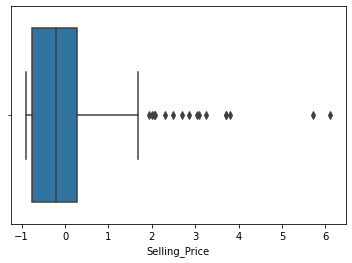

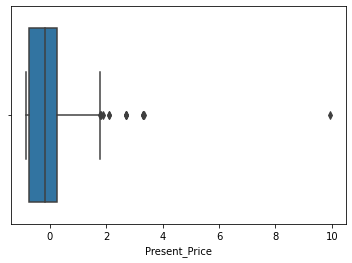

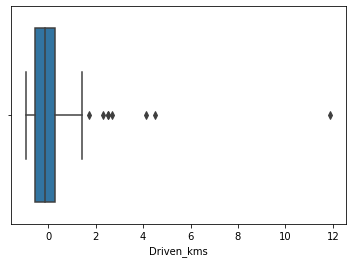

In [17]:
l=['Selling_Price', 'Present_Price', 'Driven_kms']
for i in l:
    sns.boxplot(df[i])
    plt.show()

### Remove outliers

In [18]:
import numpy as np
l = ['Selling_Price', 'Present_Price', 'Driven_kms']
for i in l:
    Q1 = np.percentile(df[i], 25, interpolation="midpoint")
    Q3 = np.percentile(df[i], 75, interpolation="midpoint")

    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Replace values outside the range with upper or lower limit
    df[i] = np.where(df[i] < lower, lower, df[i])
    df[i] = np.where(df[i] > upper, upper, df[i])

# Drop rows with outliers
for col in l:
    outliers_idx = (df[col] < df[col].quantile(0.25)) | (df[col] > df[col].quantile(0.75))
    df = df[~outliers_idx]

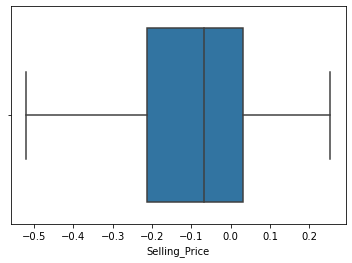

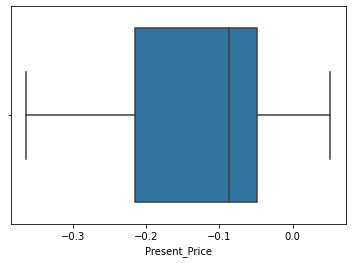

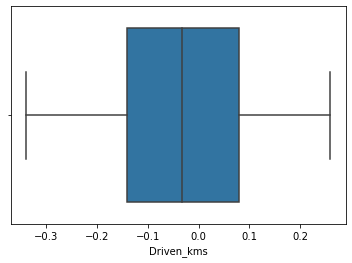

In [19]:
l=['Selling_Price', 'Present_Price', 'Driven_kms']
for i in l:
    sns.boxplot(df[i])
    plt.show()

In [20]:
df.head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Car_Name,Selling_type,Transmission,Owner,Year
0,-0.249127,-0.228138,-0.254603,2.0,90.0,0.0,1.0,0.0,2014.0
4,0.002084,-0.078466,0.142061,1.0,92.0,0.0,1.0,0.0,2014.0
17,-0.269224,-0.286604,-0.036374,NaN,NaN,NaN,NaN,NaN,NaN
18,-0.389805,0.051329,0.116181,0.0,96.0,0.0,1.0,0.0,2015.0
31,0.072423,-0.005968,0.053485,2.0,90.0,0.0,1.0,0.0,2011.0
39,0.253295,0.038466,-0.318172,2.0,93.0,0.0,1.0,0.0,2003.0
47,0.243246,0.019757,-0.283615,2.0,96.0,0.0,1.0,0.0,2006.0
55,-0.018013,-0.031693,0.092869,2.0,71.0,0.0,0.0,0.0,2009.0
57,-0.098401,-0.086651,0.065937,2.0,71.0,0.0,1.0,0.0,2010.0
60,-0.018013,0.018588,0.094256,2.0,71.0,0.0,1.0,0.0,2013.0


In [21]:
df=df.dropna()
df.head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Car_Name,Selling_type,Transmission,Owner,Year
0,-0.249127,-0.228138,-0.254603,2.0,90.0,0.0,1.0,0.0,2014.0
4,0.002084,-0.078466,0.142061,1.0,92.0,0.0,1.0,0.0,2014.0
18,-0.389805,0.051329,0.116181,0.0,96.0,0.0,1.0,0.0,2015.0
31,0.072423,-0.005968,0.053485,2.0,90.0,0.0,1.0,0.0,2011.0
39,0.253295,0.038466,-0.318172,2.0,93.0,0.0,1.0,0.0,2003.0
47,0.243246,0.019757,-0.283615,2.0,96.0,0.0,1.0,0.0,2006.0
55,-0.018013,-0.031693,0.092869,2.0,71.0,0.0,0.0,0.0,2009.0
57,-0.098401,-0.086651,0.065937,2.0,71.0,0.0,1.0,0.0,2010.0
60,-0.018013,0.018588,0.094256,2.0,71.0,0.0,1.0,0.0,2013.0
64,0.032229,-0.069111,0.207529,1.0,81.0,0.0,0.0,0.0,2017.0


<AxesSubplot:>

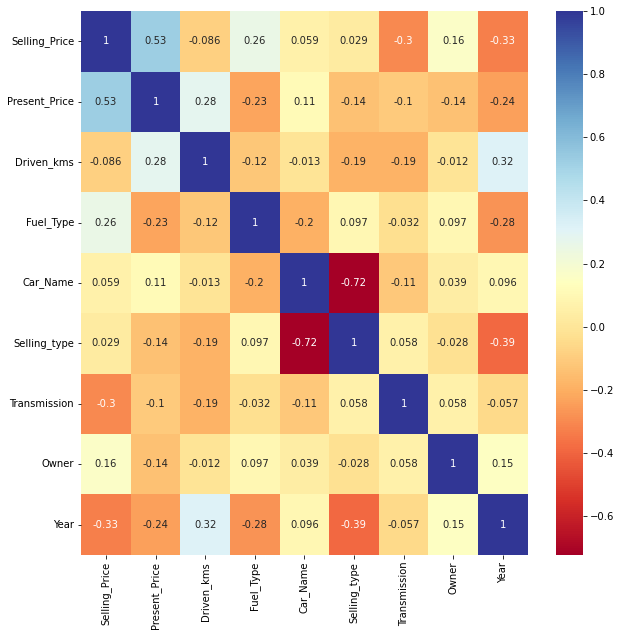

In [22]:
# Find the correlation between each pair of attributes 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')

In [23]:
df.head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Car_Name,Selling_type,Transmission,Owner,Year
0,-0.249127,-0.228138,-0.254603,2.0,90.0,0.0,1.0,0.0,2014.0
4,0.002084,-0.078466,0.142061,1.0,92.0,0.0,1.0,0.0,2014.0
18,-0.389805,0.051329,0.116181,0.0,96.0,0.0,1.0,0.0,2015.0
31,0.072423,-0.005968,0.053485,2.0,90.0,0.0,1.0,0.0,2011.0
39,0.253295,0.038466,-0.318172,2.0,93.0,0.0,1.0,0.0,2003.0
47,0.243246,0.019757,-0.283615,2.0,96.0,0.0,1.0,0.0,2006.0
55,-0.018013,-0.031693,0.092869,2.0,71.0,0.0,0.0,0.0,2009.0
57,-0.098401,-0.086651,0.065937,2.0,71.0,0.0,1.0,0.0,2010.0
60,-0.018013,0.018588,0.094256,2.0,71.0,0.0,1.0,0.0,2013.0
64,0.032229,-0.069111,0.207529,1.0,81.0,0.0,0.0,0.0,2017.0


### Data Visualization

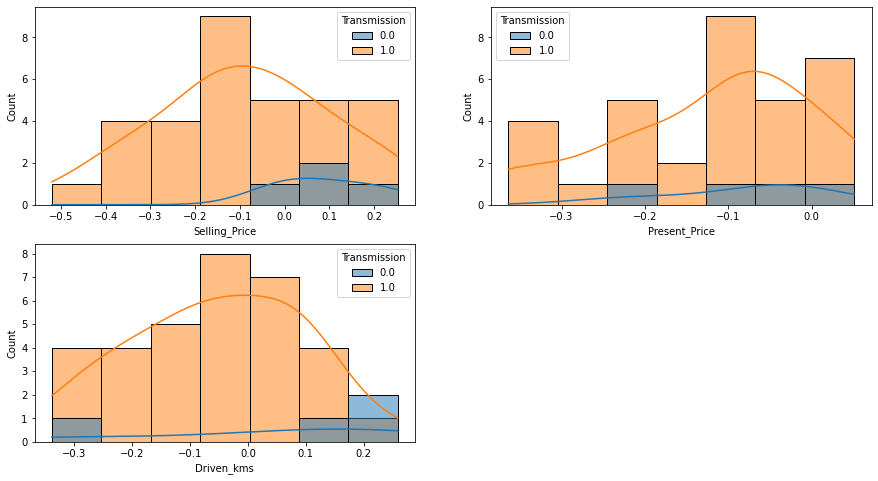

In [24]:
plt.figure(figsize = (15,8))
for i,j in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = j,kde = True,hue = 'Transmission')
plt.show()

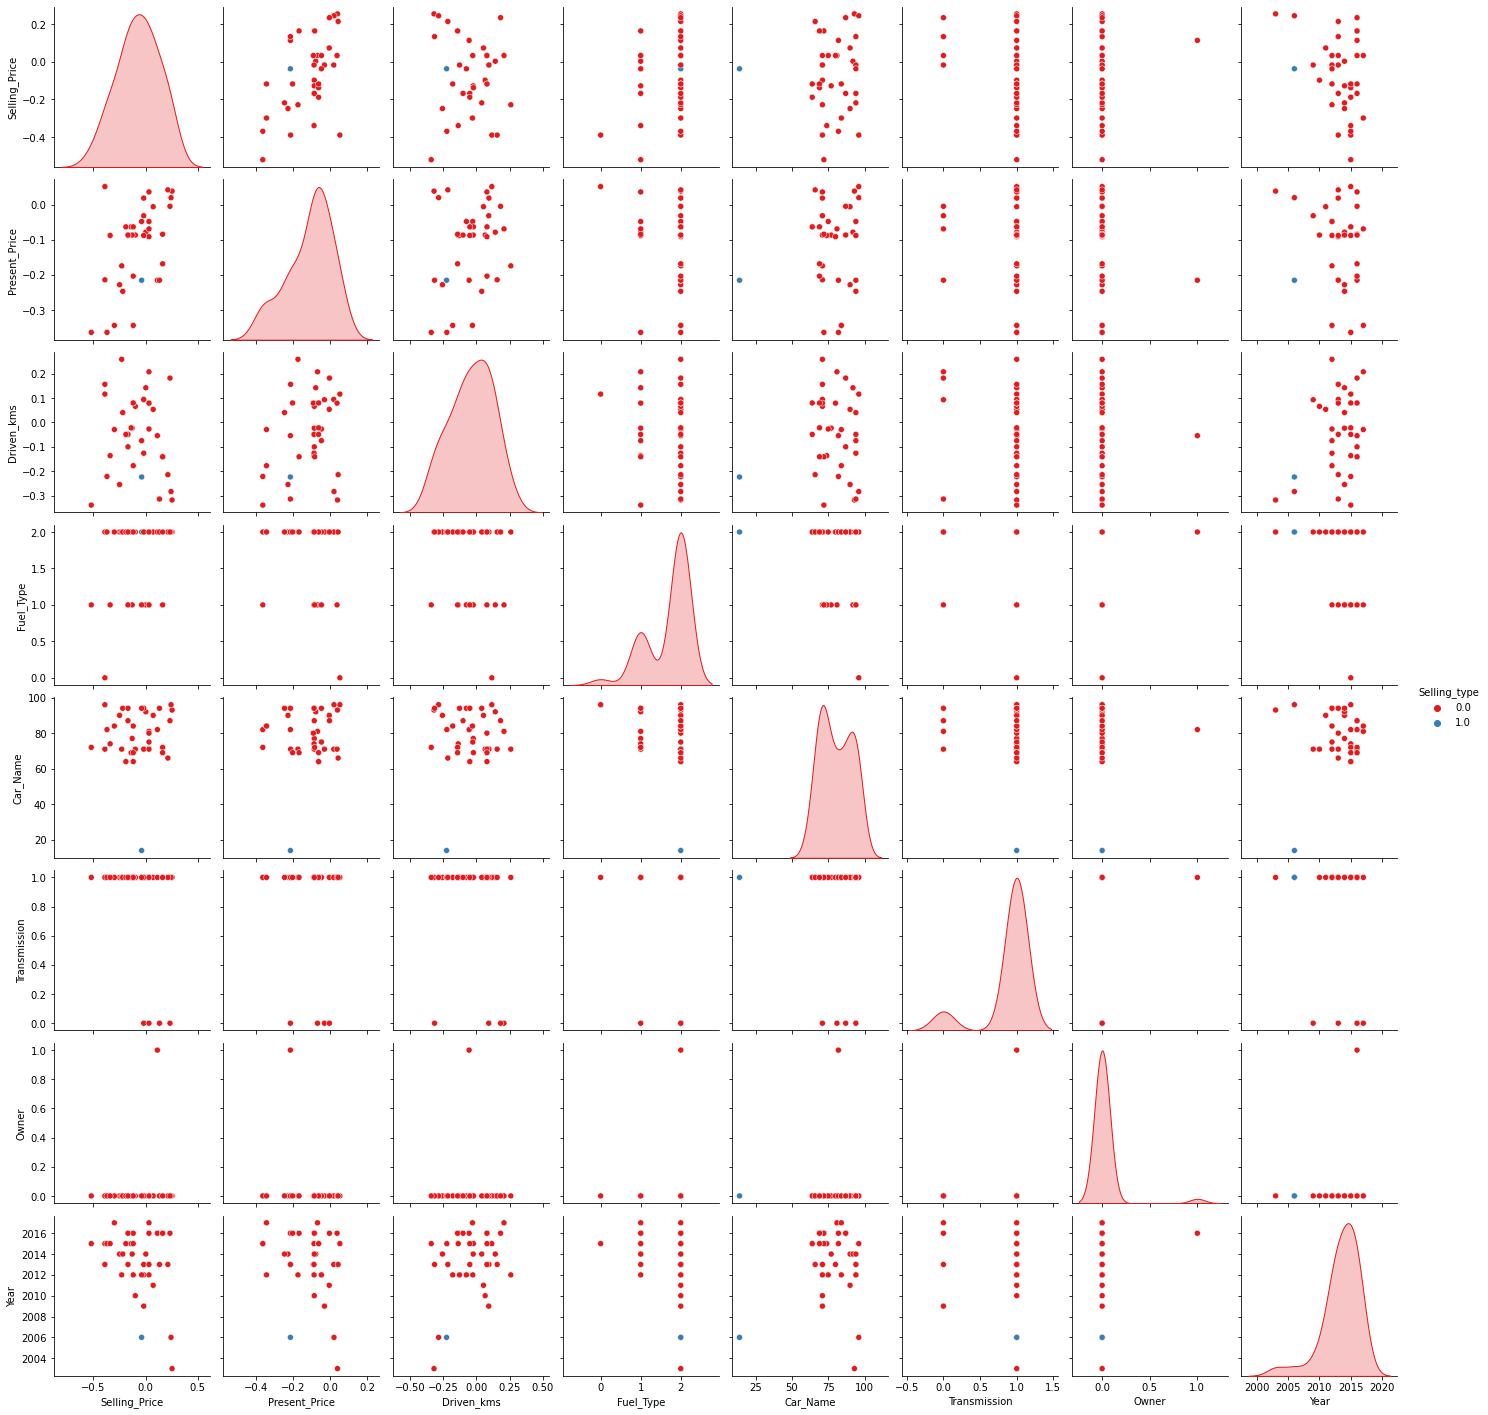

In [25]:
sns.pairplot(df, hue="Selling_type", height=2.5, palette="Set1")

Text(0.5, 1.0, 'Scatter Plot of Fuel Type and Selling Type by Transmission')

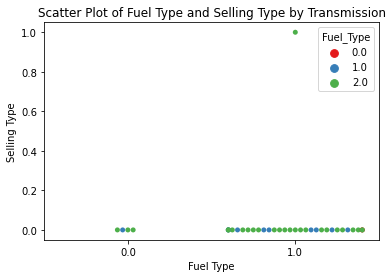

In [26]:
# Plotting Fuel_Type vs Selling_type
sns.swarmplot(x='Transmission', y='Selling_type', hue='Fuel_Type', data=df, palette="Set1")

# Adjust labels and title as needed
plt.xlabel('Fuel Type')
plt.ylabel('Selling Type')
plt.title('Scatter Plot of Fuel Type and Selling Type by Transmission')

Text(0.5, 1.0, 'Count Plot of Selling Type by Year')

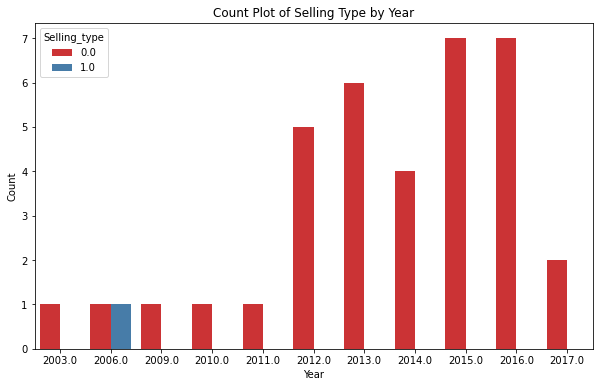

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Selling_type', data=df, palette="Set1")

# Adjust labels and title as needed
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot of Selling Type by Year')

Text(0.5, 1.0, 'Count Plot of Selling Type by Year')

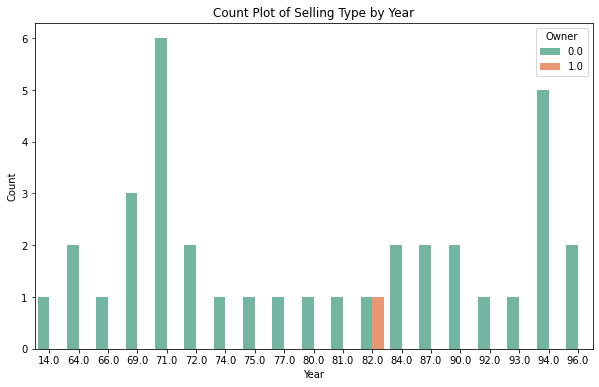

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Name', hue='Owner', data=df, palette="Set2")

# Adjust labels and title as needed
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot of Selling Type by Year')

## Model Building

In [29]:
# Splitting the dataset

x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model= LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("R2",r2_score(y_test,y_pred))

MSE 0.02513961109654371
R2 0.07842710305052536


## Interpretation

The MSE is approximately 0.0251. Lower MSE values indicate a better fit, where the model's predictions are closer to the actual values. The R-squared value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable ('Selling_Price') that is predictable from the independent variables in the model. In this case R2 value is approximately 0.0784, suggesting that the model explains about 7.84% of the variance in the 'Selling_Price. A higher R2 indicates a better fit. The model may not be performing very well based on these metrics, as the R2 is relatively low.